In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = yf.download('GOOG',period = '1y')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,93.089996,93.875000,91.900002,93.559998,93.559998,27380900
2022-12-13,98.070000,99.800003,95.379997,95.849998,95.849998,34788500
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
...,...,...,...,...,...,...
2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19235100
2023-12-06,132.899994,133.309998,131.309998,131.429993,131.429993,16360600
2023-12-07,136.600006,140.000000,136.229996,138.449997,138.449997,38419400


In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df = data['Close']
df

Date
2022-12-12     93.559998
2022-12-13     95.849998
2022-12-14     95.309998
2022-12-15     91.199997
2022-12-16     90.860001
                 ...    
2023-12-05    132.389999
2023-12-06    131.429993
2023-12-07    138.449997
2023-12-08    136.639999
2023-12-11    134.699997
Name: Close, Length: 251, dtype: float64

Text(0.5, 1.0, 'Trend of close price')

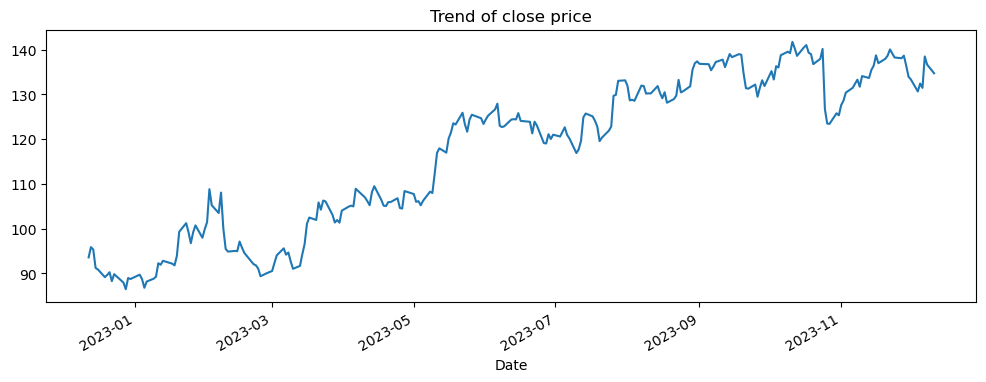

In [14]:
plt.figure(figsize=(12,4))
df.plot(linewidth = 1.5)
plt.title("Trend of close price")


In [16]:
df1 = df.reset_index()
df1

,Date,Close
0,2022-12-12,93.559998
1,2022-12-13,95.849998
2,2022-12-14,95.309998
3,2022-12-15,91.199997
4,2022-12-16,90.860001
...,...,...
246,2023-12-05,132.389999
247,2023-12-06,131.429993
248,2023-12-07,138.449997
249,2023-12-08,136.639999


In [17]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [19]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Day'] = df1['Date'].dt.day

In [20]:
df1['Month'] = df1['Date'].dt.month
df1['Weekday'] = df1['Date'].dt.day_name()

In [21]:
df1

,Date,Close,Day,Month,Weekday
0,2022-12-12,93.559998,12,12,Monday
1,2022-12-13,95.849998,13,12,Tuesday
2,2022-12-14,95.309998,14,12,Wednesday
3,2022-12-15,91.199997,15,12,Thursday
4,2022-12-16,90.860001,16,12,Friday
...,...,...,...,...,...
246,2023-12-05,132.389999,5,12,Tuesday
247,2023-12-06,131.429993,6,12,Wednesday
248,2023-12-07,138.449997,7,12,Thursday
249,2023-12-08,136.639999,8,12,Friday


<Axes: xlabel='Day'>

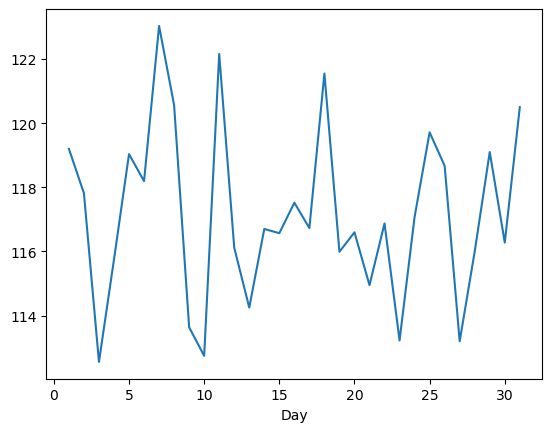

In [22]:
df1.groupby('Day')['Close'].mean().plot()

<Axes: xlabel='Month'>

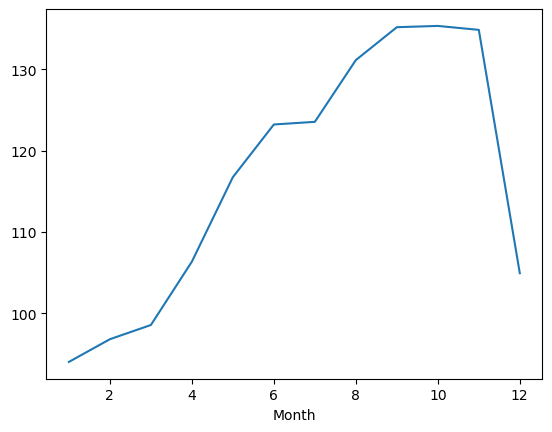

In [23]:
df1.groupby('Month')['Close'].mean().plot()

<Axes: xlabel='Weekday'>

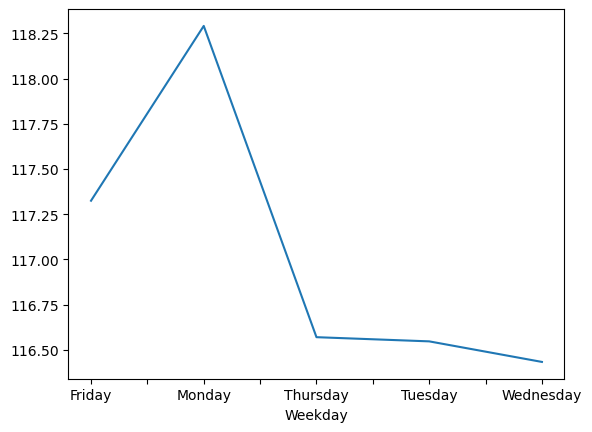

In [24]:
df1.groupby('Weekday')['Close'].mean().plot()

In [25]:
df1.groupby('Weekday')['Close'].mean().sort_index()

Weekday
Friday       117.324412
Monday       118.291739
Thursday     116.569216
Tuesday      116.546079
Wednesday    116.432308
Name: Close, dtype: float64

In [26]:
df

Date
2022-12-12     93.559998
2022-12-13     95.849998
2022-12-14     95.309998
2022-12-15     91.199997
2022-12-16     90.860001
                 ...    
2023-12-05    132.389999
2023-12-06    131.429993
2023-12-07    138.449997
2023-12-08    136.639999
2023-12-11    134.699997
Name: Close, Length: 251, dtype: float64

<Axes: xlabel='Date'>

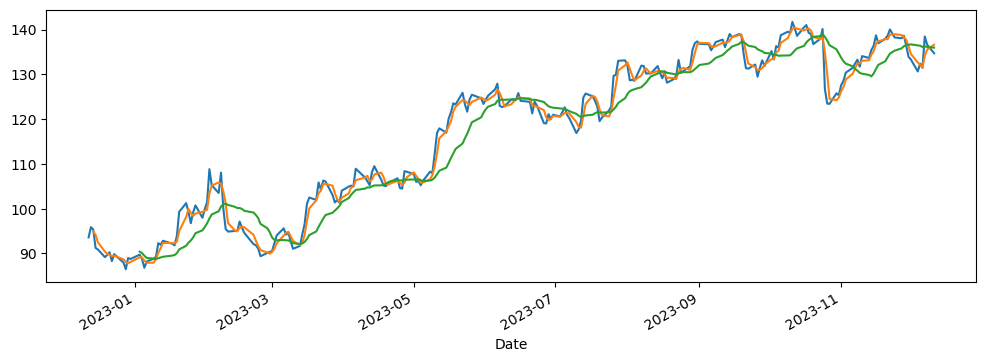

In [29]:
#### Simple moving average - 3 , 15 days
plt.figure(figsize=(12,4))
df.plot()
df.rolling(3).mean().plot()
df.rolling(15).mean().plot()

<Axes: xlabel='Date'>

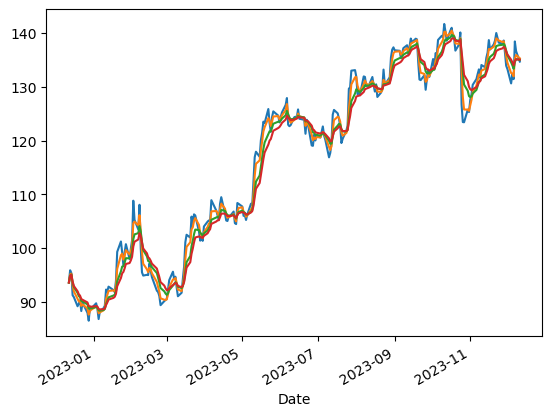

In [35]:
#### Exponential Moving Average
df.plot()
df.ewm(span = 3).mean().plot()
df.ewm(span = 7).mean().plot()
df.ewm(span = 10).mean().plot()

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
test_result = adfuller(df)
test_result

(-1.2513328195312918,
 0.6511333588108432,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1053.8373659457948)

In [39]:
df1 = df1[['Date','Close']]
df1

,Date,Close
0,2022-12-12,93.559998
1,2022-12-13,95.849998
2,2022-12-14,95.309998
3,2022-12-15,91.199997
4,2022-12-16,90.860001
...,...,...
246,2023-12-05,132.389999
247,2023-12-06,131.429993
248,2023-12-07,138.449997
249,2023-12-08,136.639999


In [40]:
df1['Close_first_diff'] = df1['Close'] - df1['Close'].shift(1)
df1['Close_first_diff']

C:\Users\admin\AppData\Local\Temp\ipykernel_3920\2859369665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Close_first_diff'] = df1['Close'] - df1['Close'].shift(1)


0           NaN
1      2.290001
2     -0.540001
3     -4.110001
4     -0.339996
         ...   
246    1.759995
247   -0.960007
248    7.020004
249   -1.809998
250   -1.940002
Name: Close_first_diff, Length: 251, dtype: float64

In [42]:
df1['Close_first_seasonal_diff'] = df1['Close'] - df1['Close'].shift(12)
df1['Close_first_seasonal_diff']

C:\Users\admin\AppData\Local\Temp\ipykernel_3920\3317799252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Close_first_seasonal_diff'] = df1['Close'] - df1['Close'].shift(12)


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
246   -6.309998
247   -5.510010
248    0.529999
249   -1.979996
250   -5.320007
Name: Close_first_seasonal_diff, Length: 251, dtype: float64

In [43]:
test_result = adfuller(df1['Close_first_diff'].dropna())
test_result

(-15.509042934437547,
 2.361650421973029e-28,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1053.2334170685986)

<Axes: >

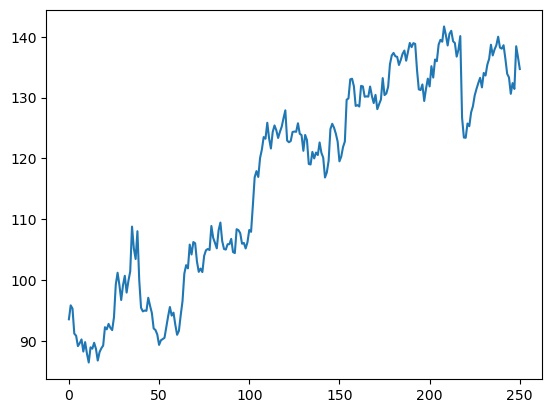

In [44]:
df1['Close'].plot()

<Axes: >

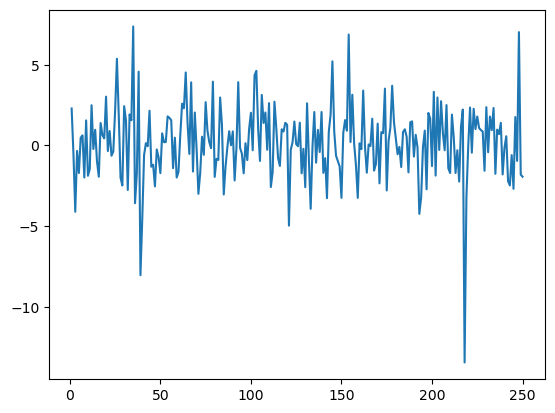

In [45]:
df1['Close_first_diff'].plot()

<Axes: >

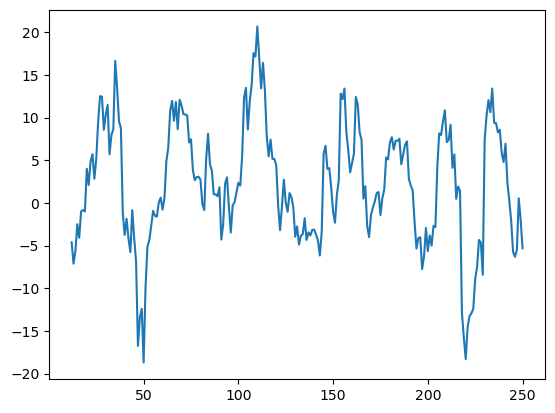

In [46]:
df1['Close_first_seasonal_diff'].plot()

In [47]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

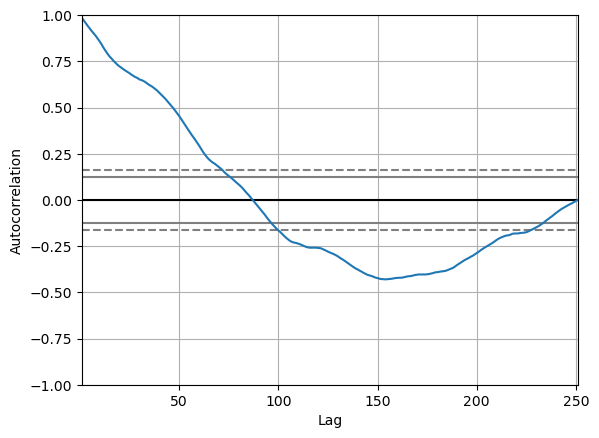

In [48]:
autocorrelation_plot(df1['Close'])

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict

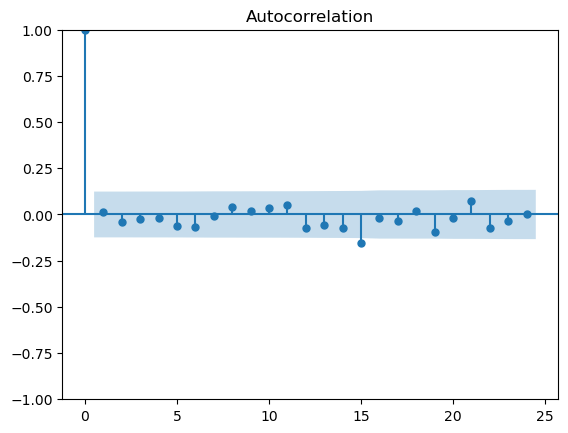

In [51]:
plot_acf(df1['Close_first_diff'].dropna())   #### p = 1
plt.show()

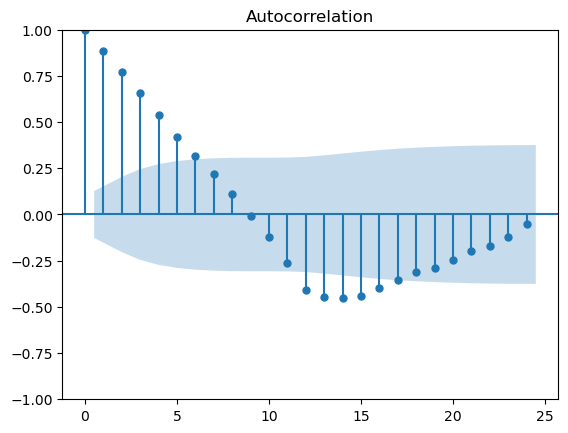

In [52]:
plot_acf(df1['Close_first_seasonal_diff'].dropna())   #### q = 1
plt.show()

In [53]:
#### order = p,d,q(1,1,1)
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(df1['Close'],order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -560.100
Date:                Tue, 12 Dec 2023   AIC                           1126.200
Time:                        19:36:39   BIC                           1136.765
Sample:                             0   HQIC                          1130.452
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4356      1.603     -0.272      0.786      -3.578       2.707
ma.L1          0.4610      1.594      0.289      0.772      -2.664       3.586
sigma2         5.1700      0.264     19.614      0.000       4.653       5.687
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               323.23
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.69
Prob(H) (two-sided):                  0.74   Kurtosis:                         8.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

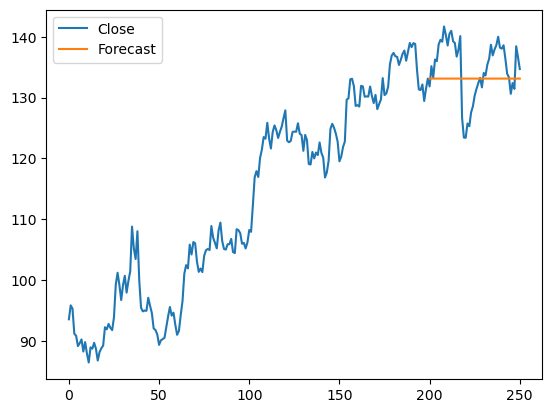

In [60]:
df1['Forecast'] = model_fit.predict(start = 200,end = 260,dynamic = True)
df1[['Close','Forecast']].plot()

In [61]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df1['Close'],order = (1,1,1),seasonal_order = (1,1,1,12))
results = model.fit()
print(results)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: >

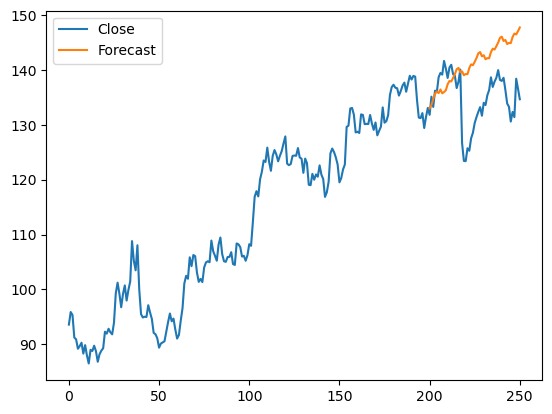

In [62]:
df1['Forecast'] = results.predict(start = 200,end = 270,dynamic = True)
df1[['Close','Forecast']] .plot()

In [63]:
df1

,Date,Close,Close_first_diff,Close_first_seasonal_diff,Forecast
0,2022-12-12,93.559998,NaN,NaN,NaN
1,2022-12-13,95.849998,2.290001,NaN,NaN
2,2022-12-14,95.309998,-0.540001,NaN,NaN
3,2022-12-15,91.199997,-4.110001,NaN,NaN
4,2022-12-16,90.860001,-0.339996,NaN,NaN
...,...,...,...,...,...
246,2023-12-05,132.389999,1.759995,-6.309998,146.064559
247,2023-12-06,131.429993,-0.960007,-5.510010,146.687408
248,2023-12-07,138.449997,7.020004,0.529999,146.531297
249,2023-12-08,136.639999,-1.809998,-1.979996,147.124065


In [64]:
dd = pd.DataFrame(pd.date_range('2023-12-11','2023-12-15'),columns=['Date'])
dd[['Close','Forecast']] = np.nan

In [65]:
dd.set_index('Date',inplace = True)

In [66]:
df1

,Date,Close,Close_first_diff,Close_first_seasonal_diff,Forecast
0,2022-12-12,93.559998,NaN,NaN,NaN
1,2022-12-13,95.849998,2.290001,NaN,NaN
2,2022-12-14,95.309998,-0.540001,NaN,NaN
3,2022-12-15,91.199997,-4.110001,NaN,NaN
4,2022-12-16,90.860001,-0.339996,NaN,NaN
...,...,...,...,...,...
246,2023-12-05,132.389999,1.759995,-6.309998,146.064559
247,2023-12-06,131.429993,-0.960007,-5.510010,146.687408
248,2023-12-07,138.449997,7.020004,0.529999,146.531297
249,2023-12-08,136.639999,-1.809998,-1.979996,147.124065


In [67]:
# Forecast for the next 3 years
forecast = results.predict(start = len(df1),
                          end = (len(df1)-1) + 3 *12,
                          typ = 'levels').rename('Forecast')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

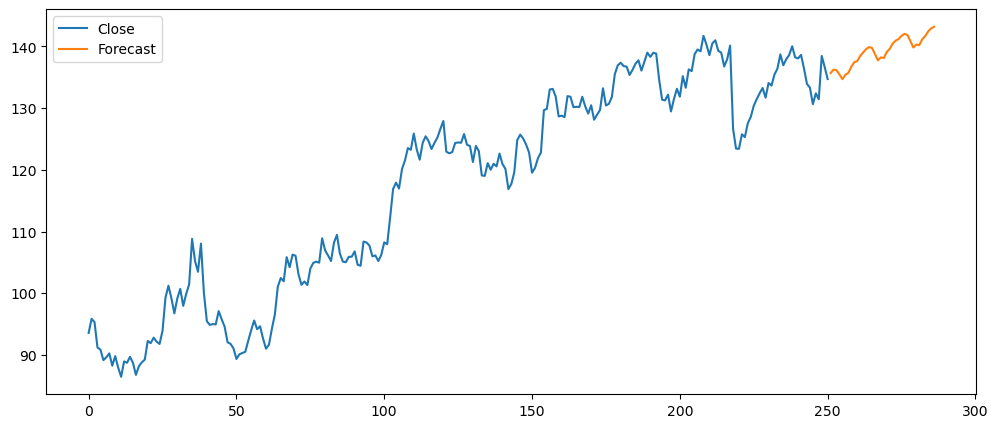

In [68]:
df1['Close'].plot(figsize = (12,5),legend = True)
forecast.plot(legend = True)